<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 2*

---

# Generalization

## 🏆 학습 목표

- 일반화란 무엇인지 이해하고 다양한 모델 검증 방법을 통해 일반화 성능을 확인할 수 있습니다.
- HoldOut Validation과 Cross Validation의 차이를 이해하고 상황에 맞게 사용할 수 있습니다. 
- 과적합/과소적합을 일반화 관점에서 설명할 수 있습니다.
- 편향/분산의 트레이트오프 개념을 이해하고 일반화 관점에서 설명할 수 있습니다.

### Warm up
#### 다음 영상을 시청해주세요.

- [Generalization and Machine Learning.](https://www.youtube.com/watch?v=0rE_tUSxbSI)
    - 여러 가지 예시를 보면서 일반화란 무엇인지 설명해보세요.
<br></br>

- [Machine Learning Fundamentals: Bias and Variance](https://youtu.be/EuBBz3bI-aA)
    - low bias, low variance 모델은 어떤 모델을 말하나요? 훈련/테스트세트를 사용해 설명해 보세요.

---

## 1. Generalization

N211에서 우리는 머신러닝의 목적이 기존의 데이터로부터 패턴을 학습한 뒤 `새로운 데이터(혹은 보지 않은 데이터)가 들어왔을 때 예측을 잘 하는 것`이라고 배웠습니다.  
`일반화(Generalization)`란 모델을 만드는 데 사용된 분포와 동일한 분포에서 추출한 이전에는 볼 수 없었던 새로운 데이터에 적절하게 적응하는 모형의 능력을 의미합니다.  
즉, **머신러닝의 목적은 일반화가 잘 된 예측 모델을 만드는 것**이라고 할 수 있습니다.  

하지만 만약 우리가 갖고 있는 데이터 세트를 모두 이용해 예측 모델을 만든다면 보지 않은 데이터는 어떻게 얻을 수 있을까요?

일반화가 잘됐다는 것을 어떻게 판단할 수 있을까요?

## 2. Data Split & Validation

### Hold-Out
이런 경우에는 기존의 데이터 세트를 두 가지로 분할해서 사용할 수 있습니다. 데이터 세트를 따로 떼어놓는 방법이기 때문에 holdout 기법이라고 말합니다. 아래와 같이 2개로 나눌 경우 2way holdout이라고 합니다.

1. training set : 모델을 학습시키기 위한 세트
2. test set : 모델을 테스트하기 위한 세트  
    test set가 의미있으려면 두 가지 조건이 충족되어야 합니다.
    - 의미있는 결과를 낼 수 있을 정도로 데이터 사이즈가 충분히 큰가?
    - 테스트 데이터가 전체 데이터를 대표할 수 있는가? 즉, 훈련 세트와 다른 특징을 가진 데이터여서는 안 된다는 의미입니다. --> 모델을 만드는 데 사용된 분포와 동일한 분포에서 추출

모델 학습 전 데이터를 훈련 세트와 테스트 세트로 나누어야 모델이 보지 않은 데이터를 확보할 수 있고 우리가 만든 모델의 예측 성능을 제대로 평가할 수 있습니다.  
다시 강조하자면 **학습에 사용하는 데이터와 모델을 평가하는데 사용하는 데이터가 달라야 한다**는 의미입니다!  

여기서 주의해야할 점이 있습니다.  
절대로 테스트 세트를 여러번 사용해서는 안 된다는 것입니다! 테스트 세트를 여러번 사용하면서 모델을 개선시키면 의도치 않게 테스트 세트에 적합한 모델을 만들 수 있습니다.  
그 결과 모델이 보지 않은 데이터라는 의미가 퇴색되버립니다. 

<img src ="https://ifh.cc/g/jPs1ZH.png" width="50%">




그렇다면 모델을 평가하고 개선시킬 때는 어떤 방법을 사용할 수 있을까요?  
데이터의 크기가 충분히 크다면 오직 모델 평가만을 위한 세트를 만들 수 있을 것입니다. 데이터를 아래와 같이 세 종류로 분할하여 모델을 검증하는 방법을 3 way hold-out 검증이라고 말합니다.  

1. train set : 모델 학습을 위한 세트
2. validation set : 모델 검증을 위한 세트  
3. test set : 모델 테스트를 위한 세트 

수능에 비유하자면 train set : 학습 / validation set : 모의고사 / test set : 수능 이 될 것입니다.  
학습을 열심히 한 후 모의고사를 보면서 스스로의 실력을 확인하고 마지막에 단 한 번 수능을 보는 것처럼 모델을 학습할 때도 
1. 훈련 세트로 모델을 만든 후 
2. 검증 세트로 모델을 여러번 평가, 개선한 후 
3. 가장 마지막에 단 한 번 테스트 세트를 이용해 결과를 확인해야합니다.  

<img src="https://ifh.cc/g/ZR22fp.png" width="50%">

### 🏡 Case Study : Predicting House Price

주택 가격 데이터를 사용해 train / validation / test set로 나눠보겠습니다.

In [1]:
# 데이터를 불러옵니다.

import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')
df_t = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_test.csv')

train data와 test data를 75:25의 비율로 분할해보겠습니다.

In [2]:
## 데이터의 75% 개수
len(df)*0.75

1095.0

In [3]:
## train/test 데이터를 sample 메소드를 사용해 나누겠습니다.
train = df.sample(frac=0.75,random_state=1)
test = df.drop(train.index)

In [4]:
print("train set : ",train.shape)
print("test set : ",test.shape)

train set :  (1095, 81)
test set :  (365, 81)


train set에서 한번 더 데이터를 분할해 validation set를 만들어주겠습니다. 

In [5]:
train_2 = train.sample(frac=0.75, random_state=1)
val = train.drop(train_2.index)


In [6]:
print("train set : ",train_2.shape)
print("test set : ",test.shape)
print("validation set : ",val.shape)

train set :  (821, 81)
test set :  (365, 81)
validation set :  (274, 81)


sklearn의 train_test_split 함수를 사용하면 손쉽게 데이터를 분할할 수 있습니다.  
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split)

In [7]:
from sklearn.model_selection import train_test_split

# train, test, validation으로 데이터를 분할합니다.
train_sk, test_sk = train_test_split(df, test_size=0.25, random_state=42)
train_sk, val_sk = train_test_split(train_sk, test_size=0.25, random_state=42)

# 각 데이터 세트의 shape을 확인해보겠습니다. 
print("train set : ",train_sk.shape)
print("test set : ",test_sk.shape)
print("validation set : ",val_sk.shape)

train set :  (821, 81)
test set :  (365, 81)
validation set :  (274, 81)


.sample 메소드를 이용해서 나눈 것과 같은 크기로 분할된 것을 확인할 수 있습니다.  

이제 학습을 진행해보겠습니다.

In [8]:
# 상관관계가 높은 feature 중 일부만 사용해보겠습니다.
# 서로 상관관계가 높은 특성은 둘 중 하나만 사용하도록 하겠습니다.

num_features = df.dtypes[df.dtypes!='object'].index
df[num_features].corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [9]:
target = 'SalePrice'
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath']

# X와 y를 나누는 함수를 만들어주겠습니다. 
def x_y_split(df) :
    X = df[features]
    y = df[target]
    return X, y

#각 데이터 세트를 X와 y로 나눠주겠습니다. 
X_train, y_train = x_y_split(train_sk)
X_val, y_val = x_y_split(val_sk)
X_test, y_test = x_y_split(test_sk)

In [10]:
# 데이터가 잘 나눠졌는지 shape을 확인해보겠습니다.
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}, y_val: {y_val.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (821, 6), y_train: (821,)
X_val: (274, 6), y_val: (274,)
X_test: (365, 6), y_test: (365,)


In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.options.display.float_format = '{:,.2f}'.format


def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

baseline = [y_train.mean()] * len(y_train)
eval_models(baseline, y_train)

(5888334285.119, 76735.483, 56209.047, 0.0)

In [12]:
# 모델 fit
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [13]:
comparison = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base', 'Train', 'Validation', 'Test'])
comparison['Base'] = eval_models(y_train, baseline)
comparison['Train'] = eval_models(y_train, y_train_pred)
comparison['Validation'] = eval_models(y_val, y_val_pred)
comparison['Test'] = eval_models(y_test, y_test_pred)

In [14]:
comparison

,Base,Train,Validation,Test
mse,"5,888,334,285.12","1,510,731,674.78","1,634,670,597.30","1,486,901,019.25"
rmse,"76,735.48","38,868.13","40,431.06","38,560.36"
mae,"56,209.05","25,947.85","24,771.62","25,131.92"
r2,0.00,0.74,0.75,0.79


### Cross-Validation
데이터를 세 개의 파트로 나누는 것(3 way holdout)은 몇 가지 문제가 있습니다. 

1. 데이터 크기가 작을 경우에는 적절하지 않은 방법입니다.
    - 모델 학습에 사용할 수 있는 데이터의 양이 줄어들어 모델이 데이터의 패턴을 정확히 파악할 수 없게 됩니다.
    - 검증 세트의 크기가 충분히 크지 않다면 예측 성능에 대한 추정이 부정확할 것입니다.  
<br></br>

2. 모델 선택의 문제가 있습니다. 
    - 모델 선택이란 `(1)우리가 문제를 풀기 위해 어떤 알고리즘을 사용할 것인가?`, `(2)어떤 하이퍼파라미터를 사용할 것인가?`에 대한 문제입니다. 
    - holdout 검증은 학습의 결과가 무작위로 선택된 학습 및 검증 세트에 의해 달라질 수 있습니다. 이는 모델의 신뢰성에 의문을 제기합니다.

In [15]:
# random state가 달라지면 샘플링 되는 세트도 달라집니다. 훈련/검증 세트가 달라지면 결과가 어떻게 달라지는지 확인해보겠습니다.

for i in range(1,30, 5) :
    train_sk, val_sk = train_test_split(train, test_size=0.25, random_state=i)
    X_train, y_train = x_y_split(train_sk)
    X_val, y_val = x_y_split(val_sk)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    print(f'train result of random_state {i}:',mean_absolute_error(y_train, y_train_pred).round(2))
    print(f'validation result of random_state {i}:',mean_absolute_error(y_val, y_val_pred).round(2))
    print('---------------------------------------------------------------')

train result of random_state 1: 26016.77
validation result of random_state 1: 26750.21
---------------------------------------------------------------
train result of random_state 6: 26100.5
validation result of random_state 6: 27891.86
---------------------------------------------------------------
train result of random_state 11: 26625.85
validation result of random_state 11: 25288.76
---------------------------------------------------------------
train result of random_state 16: 26341.96
validation result of random_state 16: 25629.8
---------------------------------------------------------------
train result of random_state 21: 26155.61
validation result of random_state 21: 26693.04
---------------------------------------------------------------
train result of random_state 26: 27369.54
validation result of random_state 26: 24063.17
---------------------------------------------------------------


이런 경우에는 **cross-validation(cv, 교차검증)** 방법을 사용할 수 있습니다.(`교차검증을 사용할 경우에도 테스트 세트는 미리 분리해두어야 합니다.`)  

교차검증은 holdout과 달리 훈련 세트의 모든 샘플이 검증에 사용됩니다. 일반적으로 가장 많이 사용되는 것은 **k-fold cross-validation**입니다.  
k-fold cross validation은 데이터를 모두 사용해 k번 학습과 검증을 반복합니다.  
 
1. 데이터를 k개로 분할합니다.
2. 1개의 파트는 검증세트로 이용되고 나머지 k-1개의 파트는 모두 훈련에 사용됩니다. 
3. k번의 검증 결과를 종합하여 전체 모델의 성능을 평가합니다. 

<img src = "https://ifh.cc/g/2gagQt.png" width='50%'>

In [16]:
# B: 학습과정/algorithm, C: 검증과정/prediction

이번 노트에서 사용하고 있는 데이터의 샘플은 총 1460으로 사이즈가 큰 편은 아닙니다. 이 경우 3way holdout 검증 방법을 사용하면 실제 학습에 사용되는 데이터의 크기는 821밖에 되지 않습니다.  
하지만 교차검증을 이용하면 1095개의 샘플을 학습에 사용할 수 있습니다.

In [17]:
# holdout의 경우
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}, y_val: {y_val.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (821, 6), y_train: (821,)
X_val: (274, 6), y_val: (274,)
X_test: (365, 6), y_test: (365,)


In [18]:
# cross validation의 경우
train_cv = pd.concat([train_sk,val_sk]).reset_index(drop=True)
X_train_cv, y_train_cv = x_y_split(train_cv)

print(f'X_train: {X_train_cv.shape}, y_train: {y_train_cv.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (1095, 6), y_train: (1095,)
X_test: (365, 6), y_test: (365,)


sklearn의 KFold 함수를 사용하면 쉽게 데이터를 k개로 분할할 수 있습니다.  
[KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

# 데이터를 몇개의 파트로 분할했는지 알 수 있습니다.
print('k =',kf.get_n_splits())

# split을 하면 데이터를 k번 k개로 분할합니다.
# 5번 학습을 진행하고 결과를 저장해 보겠습니다.

cv_result = []
for train_idx, test_idx in kf.split(X_train) :
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # 위에서 선언한 linear regression
    model.fit(X_train_cv, y_train_cv)

    # 모델 예측
    y_pred_cv = model.predict(X_val_cv)

    # mae를 구해보겠습니다.
    mae_cv = mean_absolute_error(y_val_cv, y_pred_cv).round(2)
    cv_result.append(mae_cv)

print('mae for each fold : ', cv_result)
print('average mae for model : ', np.mean(cv_result).round(2))
print('std of result : ', np.std(cv_result).round(2))

k = 5
mae for each fold :  [29572.96, 28756.54, 25459.89, 29523.81, 28620.38]
average mae for model :  28386.72
std of result :  1513.79


cross_val_score를 사용하면 쉽게 각 fold의 스코어를 확인할 수 있습니다. 
[cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)

In [23]:
# k-fold cross validation; k = 5
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(
    model, 
    X_train_cv, 
    y_train_cv, 
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
    )


print('mae for each fold : ', -np.round(cv_results, 2))
print('average mean for model : ', -np.mean(cv_results).round(2))
print('std of result : ', np.std(cv_results).round(2))

mae for each fold :  [28295.36 29845.32 26597.92 24041.59 32435.82]
average mean for model :  28243.2
std of result :  2846.33


In [ ]:
# k번 검증한 결과의 평균을 사용

K-fold cross validation은 k번 학습을 진행하기 때문에 학습 시간이 holdout보다 오래 걸립니다.  
따라서 데이터의 사이즈에 따라 검증 방법을 달리 해야합니다. 아래 표를 보고 언제 어떤 방법을 사용하는게 좋을지 생각해보세요.

<img src="https://sebastianraschka.com/images/blog/2018/model-evaluation-selection-part4/model-eval-conclusions.jpg" width="50%">  

[모델 검증](https://sebastianraschka.com/blog/2018/model-evaluation-selection-part4.html)

## 3. 과적합(overfitting) & 과소적합(underfitting)

- 테스트데이터에서 만들어내는 오차를 일반화 오차라고 부릅니다.
- 훈련데이터에서와같이 테스트데이터에서도 좋은 성능을 내는 모델을 **일반화가 잘 된 모델**이라고 부릅니다.
- 반면 일반화 오차가 큰 모델은 아래와 같은 두 가지 이유로 학습이 잘 이루어지지 않았다고 볼 수 있습니다. 

1. 과적합 (overfitting) 

    - 과적합은 훈련 데이터셋의 디테일과 노이즈까지 모두 학습하여 새로운 데이터를 잘 예측하지 못하는 현상을 말합니다.
    - 과적합 된 모델은 훈련 데이터셋에서의 성능은 높지만 테스트 데이터셋에서의 성능은 매우 낮습니다.
    - 과적합은 유연성이 높은 non-parametric모델이나 비선형 모델에서 나타날 가능성이 높습니다.
        - 선형회귀처럼 강력한 가정을 하지 않은 모델이기 때문에 유연하게 데이터를 학습하기 때문입니다. 
        - 다음 sprint에서 배울 tree-based model이 대표적입니다.
<br></br>

2. 과소적합 (underfitting)

    - 과소적합은 훈련 데이터셋도 제대로 학습하지 못해서 새로운 데이터를 잘 예측하지 못하는 현상을 말합니다. 
    - 과소적합 된 모델은 훈련 데이터셋에서의 성능과 테스트 데이터셋에서의 성능 모두 현저히 낮습니다.
<br>



## 4. 분산(Variance)과 편향(Bias)
- 과적합과 과소적합은 편향과 분산과 관계가 있습니다.
<br></br>
<img src='https://ifh.cc/g/WcdaAk.png' width='60%'>


### 편향
- 편향은 모델의 예측값과 실제 값과의 차이를 의미합니다. 
- 편향은 잘못된 알고리즘 가정에서 오는 에러입니다. 즉, 모델의 가정에서 오는 에러라고 할 수 있습니다.
- 위의 그림(파란색 데이터)에서 단순선형회귀모델과 다항회귀모델을 비교했을 때 단순선형회귀 모델의 예측값과 실제값의 차이가 다항회귀모델의 예측값과 실제값의 차이보다 큽니다.
- 이 경우 단순선형회귀모델은 편향이 크고 다항회귀모델은 편향이 작다고 할 수 있습니다.
- 편향이 큰 모델은 특성과 타겟 간의 관계를 제대로 파악하지 못하기 때문에 과소적합이 일어날 수 있습니다.

### 분산
- 분산은 서로 다른 데이터가 들어왔을 경우 모델의 예측값이 변동되는 양을 의미합니다.
- 분산 에러는 훈련 데이터세트의 결과에서 작은 변동이 있을 경우 모델이 얼마나 민감하게 반응하는지에 따른 에러입니다.
- 위의 그림에서 단순선형회귀의 경우 파란색 데이터와 초록색 데이터가 들어왔을 때의 에러가 크게 다르지 않습니다. 하지만 다항회귀의 경우 파란색 데이터와 초록색 데이터의 에러값이 크게 차이가 납니다.
- 이 경우 단순선형회귀는 분산이 작고 다항선형회귀는 분산이 크다고 할 수 있습니다.
- 분산이 큰 모델은 훈련 데이터의 노이즈까지 학습하여 과적합이 일어날 수 있습니다.

### 분산과 편향의 Trade-off
- 아래 supplementary에 detail 설명 확인
- MSE 식을 reducible, irreducible 에러로 나누어 표현하면 Bias 에러 + Variance 에러 + irreducible 에러로 나뉘게 됩니다.
    - 이 식에 대한 심화된 내용은 Supplementary를 확인해주세요.
$${\displaystyle \operatorname {E} _{D}{\Big [}{\big (}y-{\hat {f}}(x;D){\big )}^{2}{\Big ]}={\Big (}\operatorname {Bias} _{D}{\big [}{\hat {f}}(x;D){\big ]}{\Big )}^{2}+\operatorname {Var} _{D}{\big [}{\hat {f}}(x;D){\big ]}+\sigma ^{2}}$$
    

- MSE가 고정되어 있다는 가정 하에 분산 에러가 커지면 편향 에러는 작아지고 반대로 편향 에러가 커지면 분산 에러는 작아질 것입니다.
- 이처럼 두 에러는 Trade-off 관계에 있습니다.
- 모델의 복잡도를 변경하며 중간의 일반화가 잘 되는 지점을 찾아주어야 합니다.
    - 모델이 복잡해질수록 분산 에러가 커지고 모델이 단순해질수록 편향 에러가 커집니다.
    - 모델의 복잡도는 데이터의 크기에 따라 달라질 수 있습니다.



<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png" width="600">

### 다항선형회귀 예시
- 독립변수와 타겟변수 사이에 비선형 관계를 학습할 수 있는 다항회귀모델(polynomial regression)의 차수(degrees)를 조정해 회귀곡선을 만들어보는 실험을 해보겠습니다.
- Sklearn의 PolynomialFeatures는 다항회귀모델을 쉽게 구현하도록 도와줍니다. 이름에서 알 수 있듯이 다항 특성(polynomial features)을 방정식에 추가하는 것 입니다. 
    - 다항 특성은 특성들의 상호작용을 보여줄 수 있기 때문에 상호작용특성(interaction features)이라고도 부릅니다.
- 예를들어  $𝑥_1$ ,  $𝑥_2$  두 특성을 가진 데이터가 입력으로 들어오면 이것을 기준으로 degree=2 인 새로운 특성을 만들어 내는데 즉 특성이 다음과 같이 변합니다.  
    ( $𝑥_1$ ,  $𝑥_2$ ) $\rightarrow$ (1,  $𝑥_1$,  $𝑥_2$,  ${𝑥_1}^2$, ${𝑥_2}^2$ ,  $x_1x_2$ )

[sklearn PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [ ]:
# 실험에 사용할 랜덤 데이터를 만듭니다 (30, 2)

import numpy as np

np.random.seed(42)
x = np.random.normal(0, 0.5, 500)
e = np.random.normal(0, 0.5, 500)
alpha = 1
beta1 = -2
beta2 = 2

y = alpha + beta1 * x + beta2 * x**2 + e

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures(2) : [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train)


# X_poly : [1, x, x^2]
print("1차항 X_train.shape:",X_train.shape)
print("2차항 X_train.shape:", X_poly.shape)


1차항 X_train.shape: (375, 1)
2차항 X_train.shape: (375, 3)


Degree=1


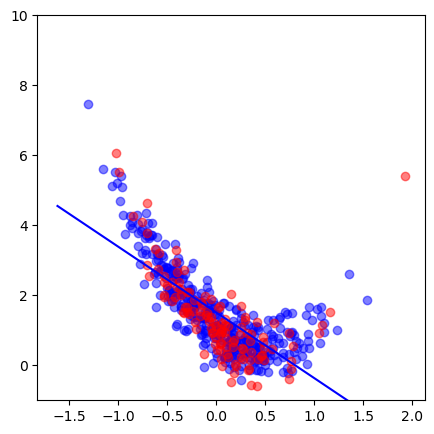

Degree=3


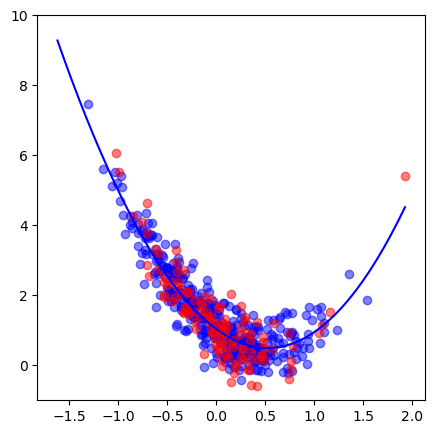

Degree=4


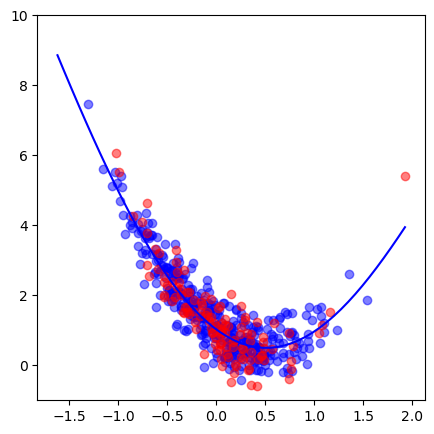

Degree=6


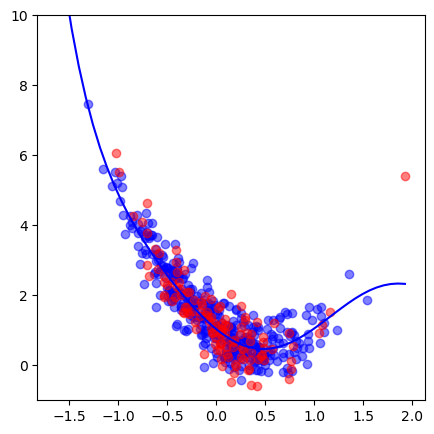

Degree=10


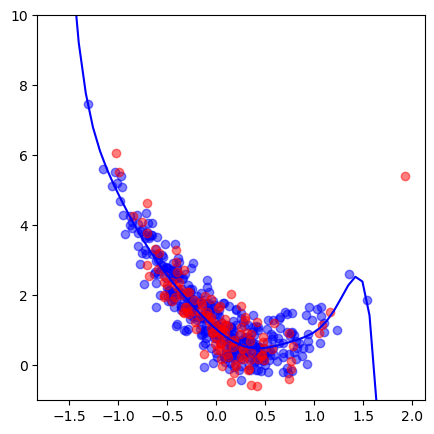

Degree=20


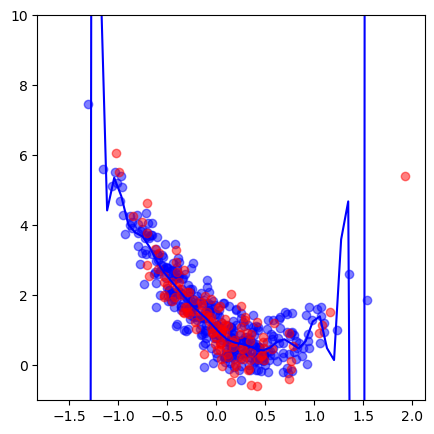

In [ ]:
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5,5)

# 다항회귀모델도 결국 다중선형회귀모델로 변형하여 모델을 만들 수 있는 선형모델입니다.
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))

polynomial_degrees = [1, 3, 4, 6, 10, 20]
train_r2s = []
test_r2s = []                                                                                                                                                   

for degree in polynomial_degrees:
    model = PolynomialRegression(degree)
    print(f'Degree={degree}')
    
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    display(HTML(f'<b style="color: blue">train R2 {train_r2:.2f}</b>'))
    display(HTML(f'<b style="color: red">test R2 {test_r2:.2f}</b>'))

    plt.scatter(X_train, y_train, color='blue', alpha=0.5)
    plt.scatter(X_test, y_test, color='red', alpha=0.5)
    
    x_domain = np.linspace(x.min(), x.max()).reshape(-1,1)
    curve = model.predict(x_domain)
    plt.plot(x_domain, curve, color='blue')
    plt.ylim(-1, 10)
    plt.show()
    display(HTML('<hr/>'))
    
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)

degree 1: 성능 별로-> 과소적합 <br>
degree 3: 괜찮음<br>
degree 4: 괜춘<br>
degree 6: 괜춘<br>
degree 10: test가 전혀 맞추지 못하고 있음 -> 과적합<br>
degree 20: test가 전혀 맞추지 못하고 있음 -> 과적합<br>

## 👏 마무리
#### 이번 노트에서는 
- 일반화란 무엇인가에 대해 배웠습니다.
- 일반화 성능을 정확히 판단하기 위한 모델 검증 방법에 대해 배웠습니다.
    - 3 way holdout
    - cross validation
- 모델의 복잡도에 따라 편향과 분산 에러가 일어날 수 있으며 이는 과소적합, 과적합과 관련되어 있다는 것을 배웠습니다.

<br></br>

#### 학습 후 아래 질문에 답해보세요
1. 일반화를 어떻게 정의할 수 있나요? 
2. 데이터를 분리하는 이유는 무엇인가요?
3. 데이터 크기 별로 일반화 검증 방법이 어떻게 달라지나요?
5. 분산과 편향의 관계를 어떻게 정의할 수 있나요?
6. 과적합과 과소적합의 차이는 무엇인가요?


## 참고자료

#### 훈련/검증/테스트 세트 분리
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/validation/another-partition)

#### cross-validation
- [Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning](https://arxiv.org/pdf/1811.12808.pdf)

#### Bias-Variance Tradeoff

- [Bias/Variance](https://youtu.be/SjQyLhQIXSM)
- [Machine Learning Fundamentals: Bias and Variance](https://youtu.be/EuBBz3bI-aA)
- [The Bias-Variance Tradeoff](https://towardsdatascience.com/the-bias-variance-tradeoff-8818f41e39e9)
- [Python Data Science Handbook,Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#The-Bias-variance-trade-off)


<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2 / Supplementary*

---

# Bias-Variance Trade-off

### 머신러닝 모델은 당연하게도 **현실 세계의 입력값과 출력값 간의 관계를 완전히 모방**하는 것을 목표로 합니다. 
- 예를 들어, 세상 모든 사람들의 **건강 및 신상 정보**와 각 사람이 **당뇨에 걸릴지 아닐지 여부**는 어떤 **패턴**을 가질 것입니다. 머신러닝 모델은 이 패턴을 완벽하게 학습하여, **항상 현실과 동일한 결과를 내는 것이 목적**입니다.

### 어떤 전지전능한 신이 있어서, 모델링하고자 하는 특정 패턴에 대한 **이 세상의 모든 정보를 $D_{real}$이라는 데이터셋**으로 가지고 있다고 합시다.

$$ D_{real} = \left\{(X_1, y_1), ..., (X_N, y_N), ... \right\} $$ 

- 이 데이터셋은 위와 같이 표현된다고 합시다.
  - $X_i$는 사람의 당뇨 여부를 제외한 모든 개인정보이고, $y_i$는 사람의 당뇨 여부라고 합시다.

### 하지만 현실적으로 우리는 **세상 모든 정보 데이터셋 $D_{real}$ 를 전부 사용해서 모델을 학습할 수 없습니다.**
- 현실적으로 우리는 우리 주변에서 얻을 수 있는, **$D_{real}$에서 샘플링된 데이터셋**에만 접근할 수 있습니다.
- 우리가 갖고 있는 데이터셋을 $D$라고 합시다. $D$는 $D_{real}$로부터 샘플링된 데이터셋으로, $n$개의 데이터가 존재하며 아래와 같이 표현합시다.
  - ~ 기호는 샘플링되었다는 뜻입니다.
  - 우리는 $n$명의 건강정보와 당뇨 여부 데이터를 가지고 있는 것입니다.

$$ D \sim D_{real} $$
$$ D = \left\{(X_1, y_1), ..., (X_n, y_n) \right\}$$

### 여기서 한번 상상해 볼까요?
- 절대 실현가능하지 않지만, 우리가 
  - **모든 데이터를 가지고 있고,**
  - **이 데이터에 가장 적합한 모델이 무엇인지도 알고 있다**고 합시다.
- 이 상황에서 만들어지는 모델 이름을 $f$라고 합시다.
- 하지만 이 $f$조차도 현실 세계를 있는 그대로 모방할 수는 없습니다. 현실 세계는 항상 절대로 모델링할 수 없는 노이즈를 포함하고 있기 때문입니다.
  - 예를 들어, 완전히 동일한 건강 정보를 가진 두 사람일지라도, 한 명은 당뇨에 걸리고 다른 한 명은 당뇨에 걸리지 않을 수 있습니다.
  - 이런 노이즈는 우리가 갖고 있는 어떤 정확한 머신러닝 모델로도 모델링할 수 없습니다!

- 절대 줄일 수 없는 노이즈가 있다는 사실을 인정합시다. 
- 하지만, 우리는 모든 데이터와 가장 적합한 모델을 알고 있기 때문에, 우리가 만드는 모델은 엄청나게 괜찮은 모델일 것입니다. 
- 이런 모델이 실제로는 없지만, 있다고 치고, 이 모델의 예측값과 실제값 간의 **오차는 모든 데이터에 대해 평균적으로는 0**이라고 가정합시다.

$$ y = f(x) + \epsilon $$
$$ where \space \epsilon \sim N(0, \sigma^2)$$


- 위 수식은 이렇게 해석합니다.
  - $f$라는 모델이 모든 입력 $x$에 대해 $y$값을 $\epsilon$이라는 오차를 가지고 맞힌다. 
  - 이 오차 $ \epsilon $은 분산 $\sigma^2$를 가지기 때문에, 많은 입력들에서 0이 아닌 값일 테지만, 여러 데이터에 대해 오차를 뽑아 보면 **평균적으로는** 0이다.

### 다시, 현실 세계로 돌아옵시다.
- 현실 세계에서 우리는 
  - **$D$라는 샘플링된 데이터셋을 사용해 모델을 학습시킬 수밖에 없고,**
  - **이 데이터에 가장 적합한 모델이 무엇인지도 알 수 없습니다.**
  
    (선형 모델, 트리 모델 등 여러 모델들을 많이 실험해 보면 정답에 가까운 모델을 찾을 수는 있겠죠!)

- 이 상황에서, 우리가 선택한 모델을 $\hat{f}$라고 합시다. 그리고 $D$라는 데이터로 학습한 모델을 $\hat{f}( ;D)$라고 합시다.

### 우리가 정의한 모델 $\hat{f}$ 의 Expected MSE를 계산해 봅시다.
- 사실, 우리가 가지고 있는 $D$라는 데이터셋은 **$D_{real}$로부터 샘플링된 데이터**입니다.
- 우리는 실제 완전한 데이터 $D_{real}$로부터 **어떤 $D$를 샘플링할지 모릅니다.**
- 그렇기 때문에, 우리가 가지고 있는 데이터 $D$에 한정된 $ MSE=\left( y - \hat{f} \left(x;D \right) \right)^2 $ 를 $D$에 대해 기댓값을 취합시다 ( $E_D$ ) .
  - $D$에 대해 기댓값을 취한다는 것은, 우리가 **$D_{real}$로부터 샘플링된 수많은 가능한 $D$들 중 어떤 $D$를 가지고 있든, 평균적으로 이 정도의 $MSE$를 가질 것**이라는 뜻입니다.

$$ 
\begin{aligned}

    MSE_{expected} \left(y, \hat{f}\left(x\right) \right) 
        =& E_{D} \left[ \left( y - \hat{f} \left(x;D \right) \right)^2 \right] \\
        =& E_{D} \left[ \left( y - f \left(x\right) + f \left(x\right) - \hat{f} \left(x;D\right) \right)^2 \right] \\
        =& E_{D} \left[ \left( \epsilon + f \left(x\right) - \hat{f}\left(x;D\right) \right)^2 \right] \\
        =& E_{D} \left[ \epsilon ^2 \right] + 2 E_{D} \left[ \epsilon \right] E_{D} \left[ f\left( x \right) - \hat{f} \left(x;D \right) \right] + E_{D} \left[ \left( f\left(x\right) - \hat{f} \left(x;D\right)\right)^2 \right]\\
        
\end{aligned}
$$

- 우리는 $f$가 평균적으로 항상 맞다고 가정했기 때문에, $ \epsilon \sim N(0, \sigma^2) $ 이라고 했습니다. 따라서, 아래 식이 성립합니다.
  - $ E_{D} \left[ \epsilon \right] = 0 $ 
  - $ E_{D} \left[\epsilon^2 \right] = E_{D} \left[ \left( \epsilon - E_{D}(\epsilon) \right)^2 \right] = Var \left[\epsilon \right] = \sigma ^2$



- 따라서 $MSE_{expected}$ 는 아래와 같이 표현됩니다.

$$ 
\begin{aligned}

    MSE_{expected} \left(y, \hat{f} \left(x \right) \right)  
        =& \sigma ^ 2 + E_{D} \left[ \left( f\left(x\right) - \hat{f} \left(x;D\right)\right)^2 \right] \\

\end{aligned}
$$

- 이 식을 다시 해석해 볼까요?
  - $ \sigma^2 $ 는 현실 세계에서 발생할 수밖에 없는, 어느 멋진 머신러닝 모델도 줄일 수 없는 에러와 관련된 부분입니다.
  - $ E_{D} \left[ \left( f\left(x\right) - \hat{f} \left(x;D\right)\right)^2 \right] $ 는 **우리가 선택한 모델 $ \hat{f} $** 과 **평균적으로 항상 맞는 모델 $ f $** 간의 차이와 관련된 부분입니다.
    - 이제 이 부분에 집중해서 분석해 보면 되겠군요!

### $ E_{D} \left[ \left( f\left(x\right) - \hat{f} \left(x;D\right)\right)^2 \right] $ 항을 다시 쪼개 봅시다.
  
$$ 
\begin{aligned}

    E_{D} \left[ \left( f(x) - \hat{f}(x;D) \right)^2 \right] =& E_{D} \left[ \left( \hat{f}(x;D) - f(x) \right)^2 \right] \\
        =& E_{D} \left[ \left( \hat{f}(x;D) - E_{D} \left[ \hat{f}(x;D) \right] + E_{D}\left[ \hat{f}(x;D) \right] - f(x)\right)^2 \right] \\
        =& E_{D}\left[ \left( \hat{f}(x;D) - E_{D}\left[ \hat{f}(x;D) \right] \right)^2 \right] \\
        \space& + E_{D}\left[ \left( E_{D}\left[ \hat{f}(x;D) \right] - f(x)\right)^2 \right] \\
        \space& + 2 E_{D}\left[ \hat{f}(x;D) - E_{D}\left[ \hat{f}(x;D) \right] \right] E_{D}\left[ E_{D}\left[ \hat{f}(x;D) \right] - f(x) \right] \\

\end{aligned}
$$

- 첫 번째 항 $ E_{D} \left[ \left( \hat{f}\left(x;D\right) - E_{D}\left[ \hat{f}\left(x;D\right) \right]\right)^2 \right] $는,
  - 분산의 정의 $ Var\left(x\right) = E\left[ \left( x - E\left[x\right] \right)^2\right] $ 에 따라 
  - $ E_{D} \left[ \left( \hat{f}\left(x;D\right) - E_{D}\left[ \hat{f}\left(x;D\right) \right]\right)^2 \right] = Var_{D}\left[\hat{f}\left(x;D\right)\right] $

&nbsp;
- 두 번째 항 $ E_{D}\left[ \left( E_{D}\left[ \hat{f}\left(x;D\right) \right] - f\left(x\right)\right)^2 \right] $는,
  - $ Bias_{D}\left[ \hat{f}\left(x;D\right) \right] = E_{D}\left[ \hat{f}\left(x;D\right) \right] -  f\left(x\right) $ 라 하면 
  - $ E_{D}\left[ \left( E_{D}\left[ \hat{f}\left(x;D\right) \right] - f\left(x\right)\right)^2 \right] = \left(Bias_{D}\left[ \hat{f}\left(x;D\right) \right]\right)^2$

&nbsp;
- 세 번째 항 $2 E_{D}\left[ \hat{f}(x;D) - E_{D}\left[ \hat{f}(x;D) \right] \right] E_{D}\left[ E_{D}\left[ \hat{f}(x;D) \right] - f(x) \right] $ 는,
  - $ E_{D}\left[ \hat{f}(x;D) - E_{D}\left[ \hat{f}(x;D) \right] \right] = E_{D}\left[ \hat{f}(x;D) \right] - E_{D}\left[ \hat{f}(x;D) \right] = 0$ 이므로
  - $2 E_{D}\left[ \hat{f}(x;D) - E_{D}\left[ \hat{f}(x;D) \right] \right] E_{D}\left[ E_{D}\left[ \hat{f}(x;D) \right] - f(x) \right] = 0$

- 따라서 위 식은 결국 아래와 같이 정리됩니다. 분산과 편향으로 쪼개지네요!

$$ 
\begin{aligned}
    
    E_{D} \left[ \left( f(x) - \hat{f}(x;D) \right)^2 \right] 
        =& E_{D} \left[ \left( \hat{f}(x;D) - f(x) \right)^2 \right] \\
        =& Var_{D}\left[\hat{f}\left(x;D\right)\right] + \left(Bias_{D}\left[ \hat{f}\left(x;D\right) \right]\right)^2 \\
    
\end{aligned}
$$

- 그리고 가장 위에서 우리가 봤던, 최종적으로 줄여야 할 expected MSE는 아래와 같이 정리됩니다.
  - 분산, 편향, 어느 누구도 줄일 수 없는 오차의 세 부분으로 나눠지네요!

$$ 
\begin{aligned}

    MSE_{expected} \left(y, \hat{f}\left(x\right) \right) 
        =& Var_{D}\left[\hat{f}\left(x;D\right)\right] + \left(Bias_{D}\left[ \hat{f}\left(x;D\right) \right]\right)^2 + \sigma ^2

\end{aligned}
$$

### Bias, Variance의 의미를 해석해 볼까요?

- $ Bias_{D}\left[ \hat{f}\left(x;D\right) \right] = E_{D}\left[ \hat{f}\left(x;D\right) \right] -  f\left(x\right) $
  - 우리가 $D_{real}$에서 샘플링된 어떤 $D$를 가지고 있든 간에, 우리가 선택한 모델 $\hat{f}$와 실제 평균적으로 항상 맞는 유니콘 같은 모델 $f$이 평균적으로 $Bias_{D}\left[ \hat{f}\left(x;D\right) \right]$ 만큼의 차이를 갖는다는 뜻입니다.
  - 결국 위 식은, 우리가 얼마나 **주어진 데이터를 잘 모델링**하는 모델 $\hat{f}$을 선택했는지에 따라 다릅니다.
    - 우리가 $\hat{f}$로 엄청나게 차수가 높은 다항 회귀와 같이 굉장히 복잡한 모델을 선택했다면, 그 모델들은 주어진 데이터를 잘 모델링하는데는 아주 능숙하기 때문에, Bias가 아주 낮습니다.
    - 우리가 $\hat{f}$로 선형 회귀와 같은 단순한 모델을 선택했다면, 주어진 데이터조차 잘 모델링하지 못하기 때문에, Bias가 높습니다.

&nbsp;

- $ Var_{D}\left[\hat{f}\left(x;D\right)\right] = E_{D} \left[ \left( \hat{f}\left(x;D\right) - E_{D}\left[ \hat{f}\left(x;D\right) \right]\right)^2 \right] $
  - $ E_{D} \left[ \left( \hat{f}\left(x;D\right) - E_{D}\left[ \hat{f}\left(x;D\right) \right]\right)^2 \right] $ 의 내부를 뜯어볼까요?
    - $ \hat{f}\left(x;D\right) $ 는, 우리가 가지고 있는 데이터셋 $D$로 학습된 모델입니다.
    - $ E_{D}\left[ \hat{f}\left(x;D\right) \right] $ 는, 1. $D_{real}$로부터 데이터셋을 무한대로 샘플링한 후, 2. 각 데이터셋으로 모델 $\hat{f}$를 학습시킨 후, 3. 각 $ \hat{f} $의 예측값을 평균낸 것입니다.
    - $ \hat{f}\left(x;D\right) - E_{D}\left[ \hat{f}\left(x;D\right) \right] $ 라는 친구에 대해 생각해 봅시다.
      - 내가 만약 운이 엄청 좋아서 $D_{real}$로부터 굉장히 일반적인 데이터들로 구성된 $D$를 샘플링했다면, 위 식의 값은 매우 작을 것입니다.
      - 하지만 운이 엄청 나빠서 $D_{real}$의 이상치들로만 구성된 $D$를 샘플링했다면, 위 식의 값은 매우 클 것입니다.
    - 결과적으로 $Var_{D}$라는 친구는, 내가 갖고 있는 데이터가 얼마나 질 좋고 대표성 있는 데이터인지에 따라 값이 흔들리는 친구입니다.
  - 여기서 또 생각해 봅시다. 
    - 만약 우리가 굉장히 단순하고 보수적이어서 어떤 $D$를 보여줘도 자기 고집을 유지하는 모델 $\hat{f}$을 선택했다면, $\hat{f}(x;D)$는 어떤 데이터셋 $D$로 학습되었든지 간에 출력값에 큰 변화가 없을 것입니다. 분산도 매우 작겠지요.
    - 하지만 우리가 굉장히 유연하고 $D$를 잘 반영해서 학습하는 모델을 선택했다면, $\hat{f}(x;D)$는 자신이 어떤 $D$로 학습되었는지에 따라 굉장히 다른 값을 낼 것입니다. 분산이 매우 크겠지요.


### 결국 편향-분산의 Trade-off 문제는, **나에게 주어진 $D$를 완전히 믿을 수 없기 때문에 나타나는 문제**입니다.
- **편향을 줄이는 행위는, 내가 지금 가지고 있는 $D$가 $D_{real}$을 잘 대표하고 있을 것이라고 강하게 믿는 것입니다.**
  - $D$가 굉장히 대표성 있고 잘 구성된 데이터셋이라고 강하게 믿기 때문에, 주어진 데이터 $D$를 잘 맞히는 데 집중하겠다는 것이죠. 
  - 그래서 복잡하고 유연한 모델을 선택하는 행위가 편향을 줄이는 행위인 것입니다. 복잡하고 유연한 모델은 주어진 데이터를 그대로 모방하는 데는 아주 능숙하거든요.
  - **그럼 언제 편향을 줄이면 좋을까요? 내가 가지고 있는 데이터셋의 크기가 커지면 커질수록, 내 데이터는 세상을 더 잘 반영하고 있을 것 입니다. 따라서 데이터셋의 크기가 커질수록 모델을 복잡하게 하는, 편향을 줄이는 행위를 취하는 것입니다.**
- **반대로 분산을 줄이는 행위는, 내가 지금 가지고 있는 $D$를 완벽하게는 못 믿는 상황에서 발생합니다.**
  - 내가 가지고 있는 $D$가 실제 세계의 데이터 양상과는 다를 수도 있으니, 모델로 하여금 보여주는 데이터 $D$를 그대로 따라하지 말고, 보수적으로 행동하라고 하는 것이죠.
  - 그래서 단순하고 때로는 멍청한 모델을 선택하는 행위가 분산을 줄이는 행위인 것입니다. 단순한 모델들은 고집이 세고 예측값을 크게 바꾸지 않거든요.
  - **편향과는 반대로, 내가 가지고 있는 데이터셋의 크기가 작다면, 내 데이터는 세상과 동떨어져 있을 가능성이 클 것입니다. 따라서 데이터셋의 크기가 작을수록 모델을 단순하게 해야 하는 것이지요.**
- **그리고 편향-분산 분해는, 내가 어떤 모델을 선택하든, 두 개를 동시에 줄일 수 없다는 것도 보여 줍니다.**
  - 둘의 합이 항상 일정하므로, 편향을 줄이면 분산이 오르고, 분산을 줄이면 편향이 오르죠.
  - 복잡한 모델을 쓰면 기존에 보지 못했던 데이터에 대해 이 모델이 말도 안 되는 예측을 할지도 모릅니다.
  - 단순한 모델을 쓰면 대개 비슷한 예측값을 내지만, 그 예측값은 현실 세계의 데이터와는 동떨어져 있을 것입니다.